# MACD

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [2]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import os
import pandas as pd
# import pandas_datareader as pdr
import numpy as np
import quantstats as qs
from config.constants import *
from util.plot_equity import plot_equity_trades
import matplotlib.pyplot as plt

## Get Result

## Load results strategy Buy and Hold

In [3]:
benchmark_D1 = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1.csv', index_col='Time', parse_dates=True)
benchmark_H4 = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4.csv', index_col='Time', parse_dates=True)
benckmark_H1 = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1.csv', index_col='Time', parse_dates=True)
benckmark_M30 = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30.csv', index_col='Time', parse_dates=True)

## Load results Strategy

In [4]:
folder_strategy = 'MACD'

In [5]:
result_D1 = pd.read_csv(
    f'../../out/Technical_Strategy/{folder_strategy}/Backtest/result_D1.csv', index_col='Time', parse_dates=True)
result_H4 = pd.read_csv(
    f'../../out/Technical_Strategy/{folder_strategy}/Backtest/result_H4.csv', index_col='Time', parse_dates=True)
result_H1 = pd.read_csv(
    f'../../out/Technical_Strategy/{folder_strategy}/Backtest/result_H1.csv', index_col='Time', parse_dates=True)
result_M30 = pd.read_csv(
    f'../../out/Technical_Strategy/{folder_strategy}/Backtest/result_M30.csv', index_col='Time', parse_dates=True)

## Define Strategy

# Reports each time frame

## TF D1

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-02
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          2.09%
CAGR﹪                     0.09%

Sharpe                     0.06
Prob. Sharpe Ratio         60.69%
Smart Sharpe               0.06
Sortino                    0.09
Smart Sortino              0.09
Sortino/√2                 0.06
Smart Sortino/√2           0.06
Omega                      1.01

Max Drawdown               -8.77%
Longest DD Days            1880
Volatility (ann.)          2.05%
Calmar                     0.01
Skew                       0.05
Kurtosis                   8.91

Expected Daily %           0.0%
Expected Monthly %         0.01%
Expected Yearly %          0.12%
Kelly Criterion            0.57%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.21%
Expected Shortfall (cVaR)  -0.21%

Max Consecutive Wins       11


None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-01-16  2021-05-06  2023-03-10  1880     -8.771694         -8.549108
2  2011-08-23  2011-09-08  2012-01-25   156     -4.300409         -4.214138
3  2012-02-03  2012-08-20  2013-04-14   437     -3.641232         -3.554347
4  2008-08-17  2010-06-30  2011-08-07  1086     -2.681106         -2.464228
5  2016-02-12  2016-09-30  2018-01-03   692     -2.368596         -2.195247

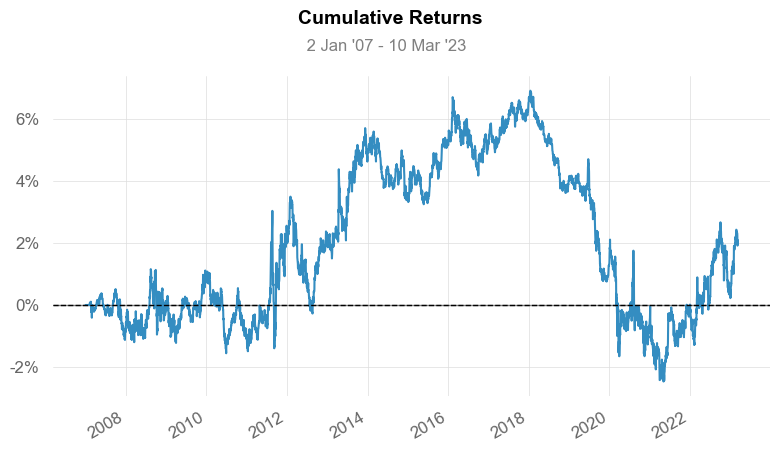

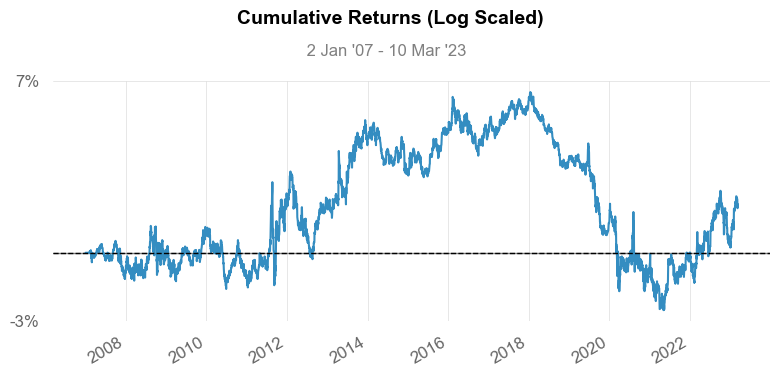

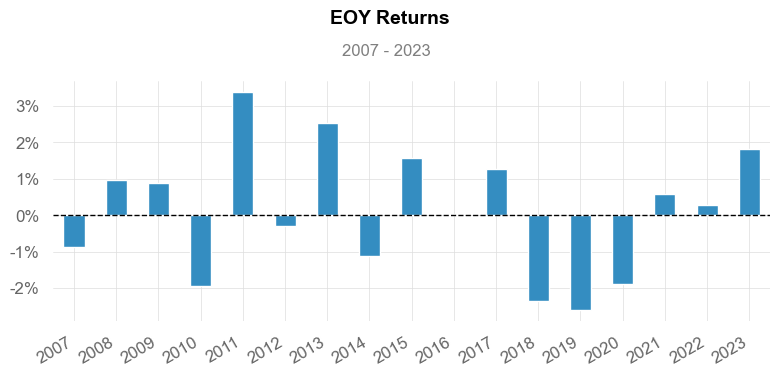

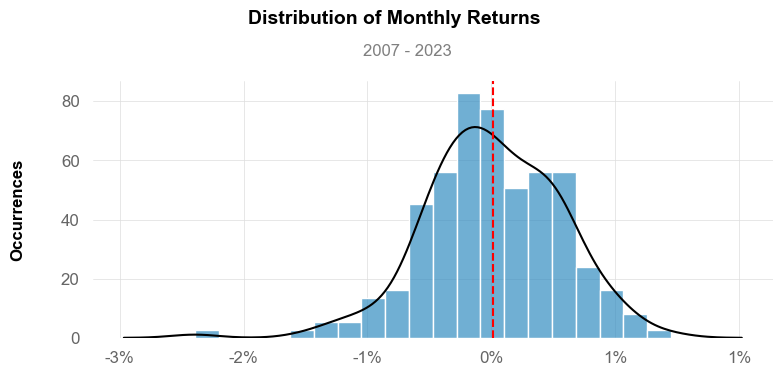

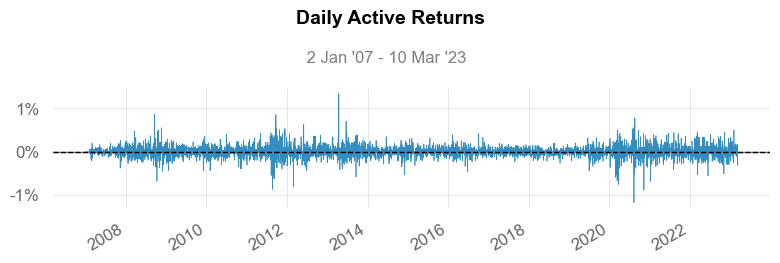

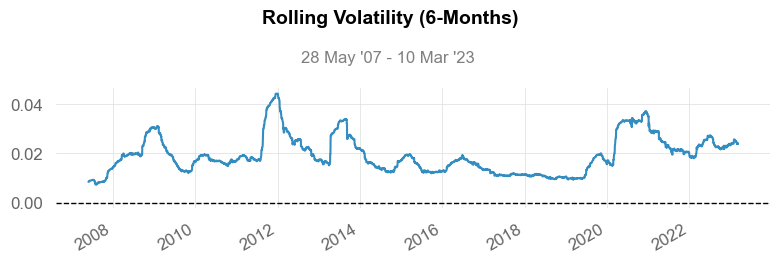

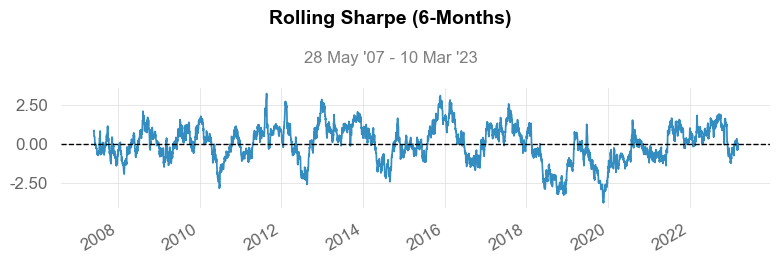

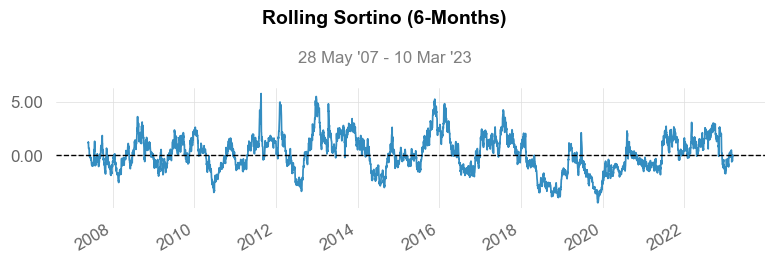

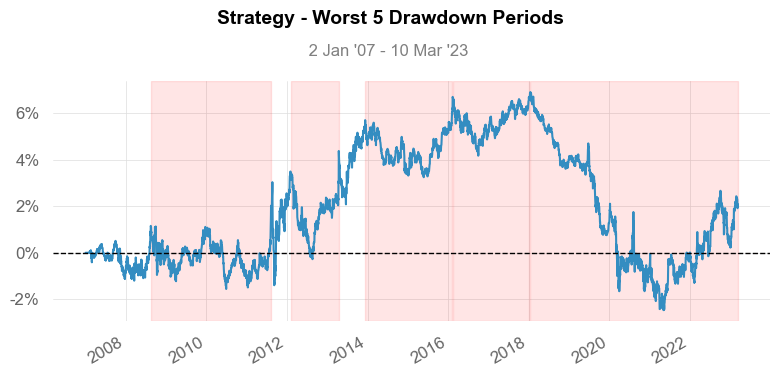

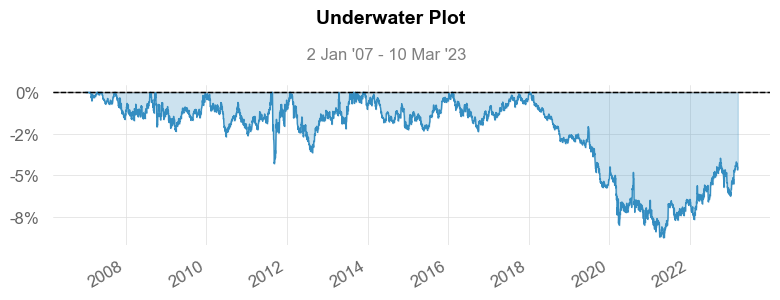

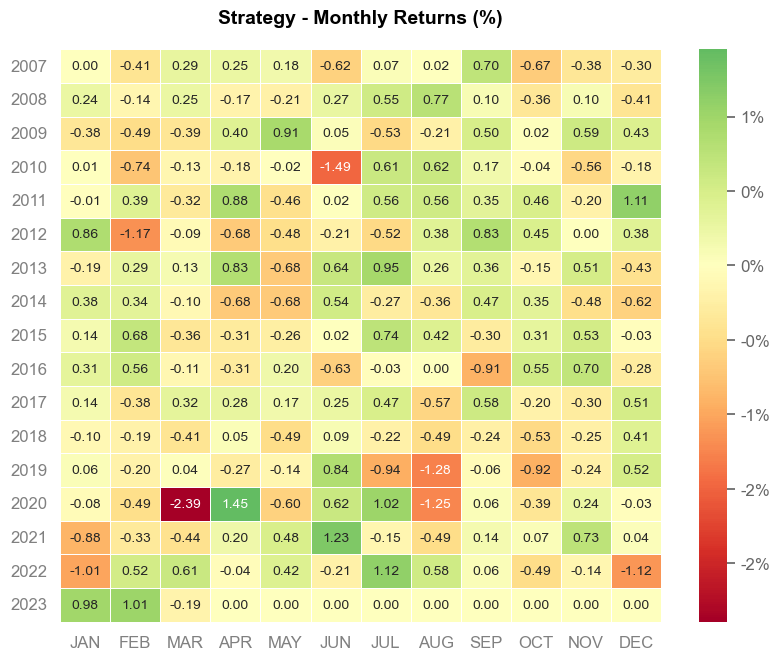

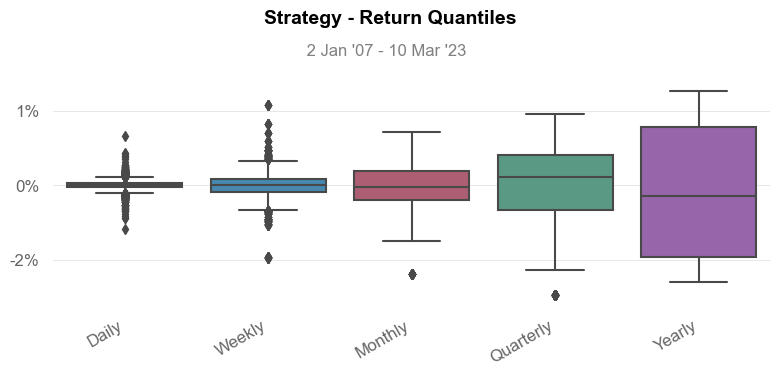

In [6]:
qs.reports.full(result_D1['Equity'].resample('D').last().dropna().pct_change())

### Compare benchmark Buy and Hold

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2007-02-09   2007-02-09
End Period                 2023-03-10   2023-03-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          11.69%       2.09%
CAGR﹪                     0.48%        0.09%

Sharpe                     0.3          0.06
Prob. Sharpe Ratio         90.68%       60.69%
Smart Sharpe               0.3          0.06
Sortino                    0.41         0.09
Smart Sortino              0.4          0.09
Sortino/√2                 0.29         0.06
Smart Sortino/√2           0.29         0.06
Omega                      1.01         1.01

Max Drawdown               -7.6%        -8.77%
Longest DD Days            3259         1880
Volatility (ann.)          1.93%        2.06%
R^2                        0.0          0.0
Information Ratio          -0.01        -0.01
Calmar                

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-01-16  2021-05-06  2023-03-10  1880     -8.771694         -8.549108
2  2011-08-23  2011-09-08  2012-01-25   156     -4.300409         -4.214138
3  2012-02-03  2012-08-20  2013-04-14   437     -3.641232         -3.554347
4  2008-08-17  2010-06-30  2011-08-07  1086     -2.681106         -2.464228
5  2016-02-12  2016-09-30  2018-01-03   692     -2.368596         -2.195247

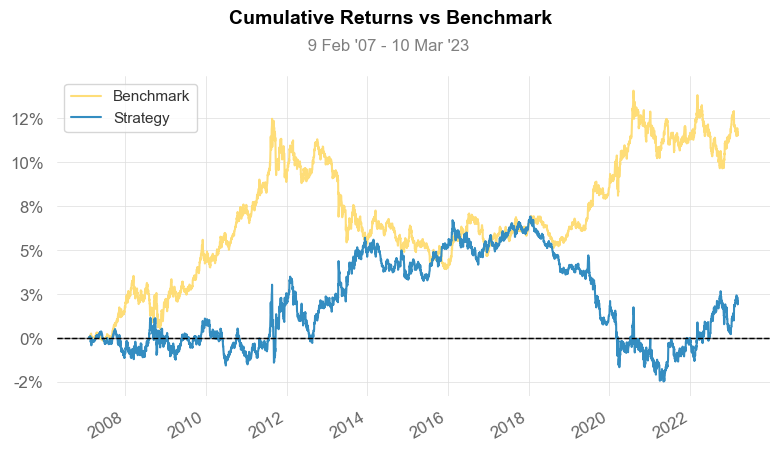

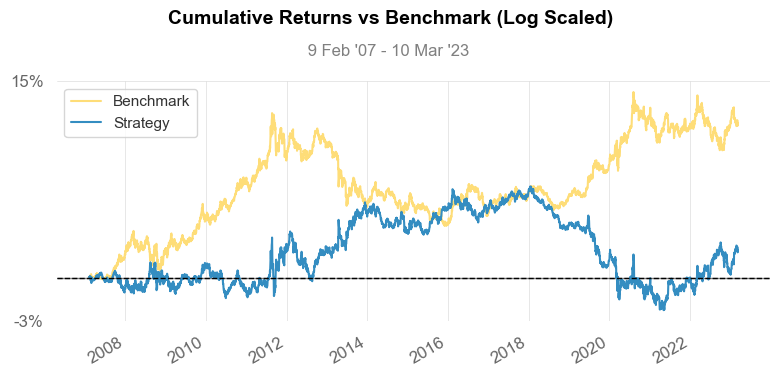

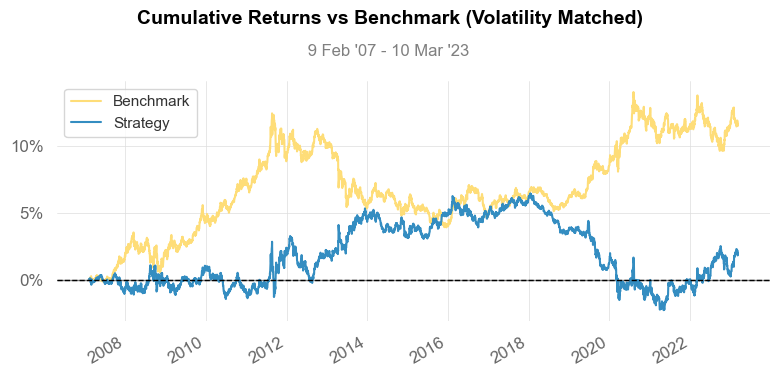

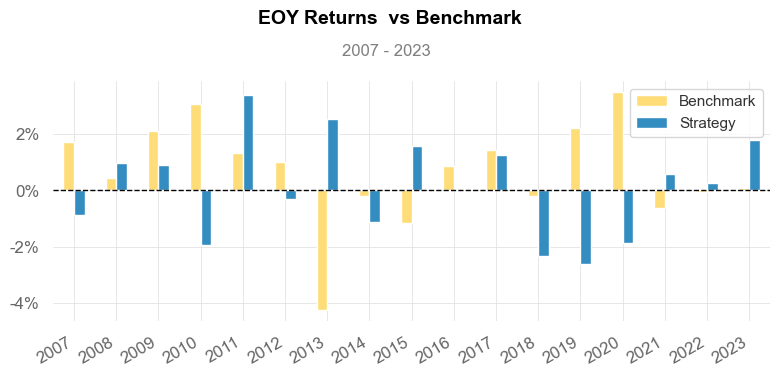

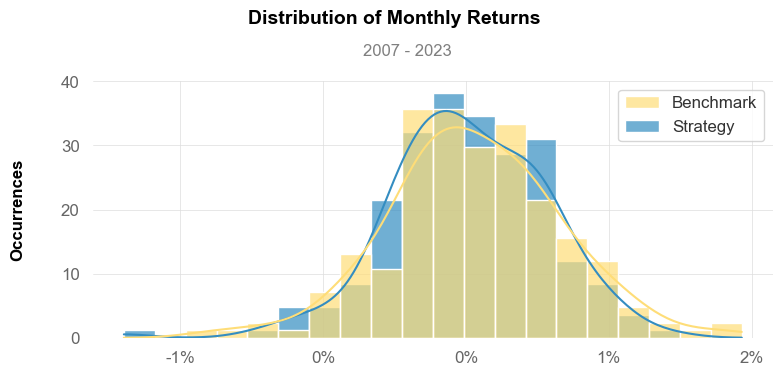

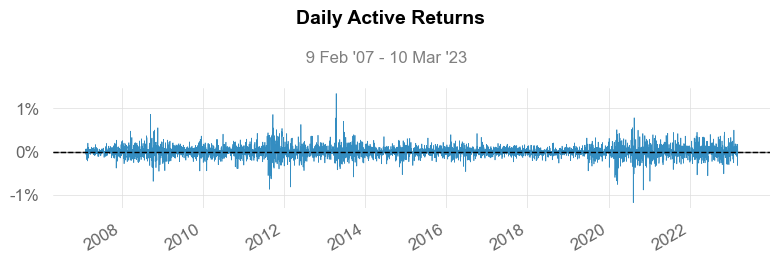

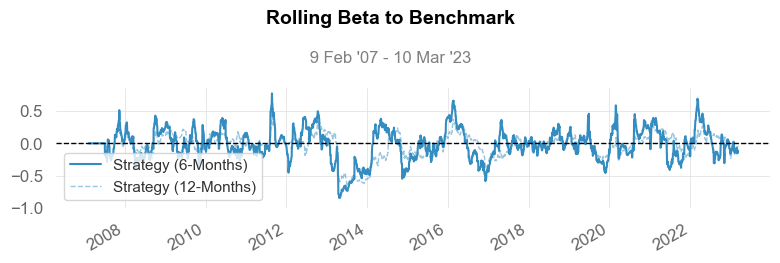

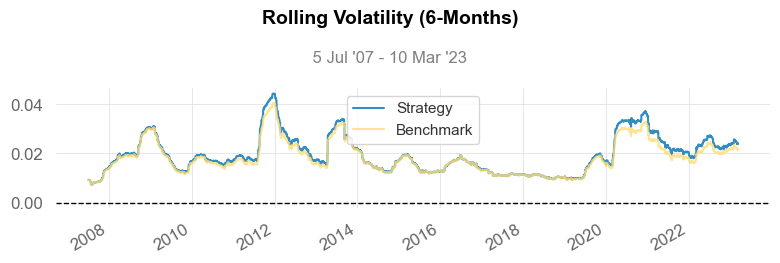

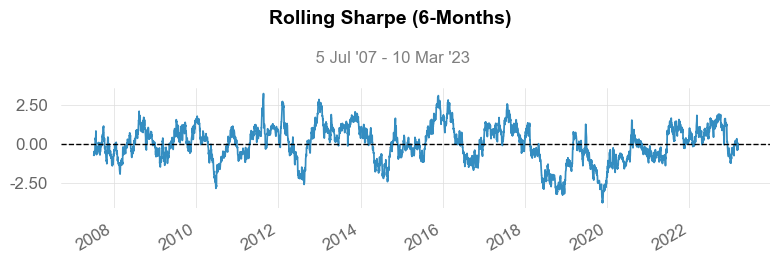

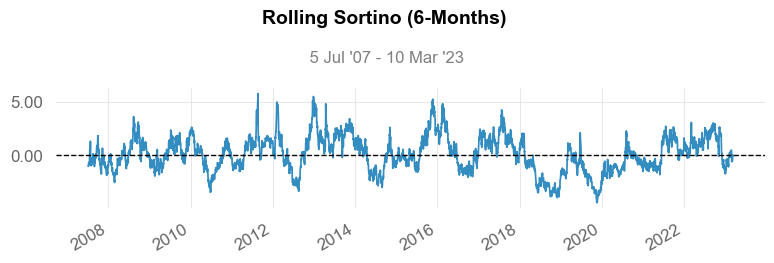

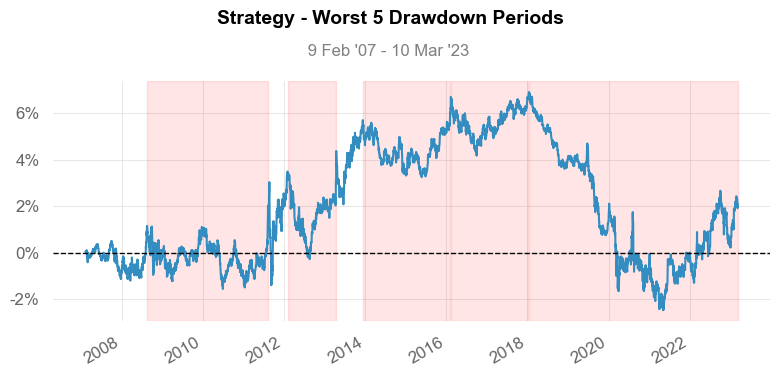

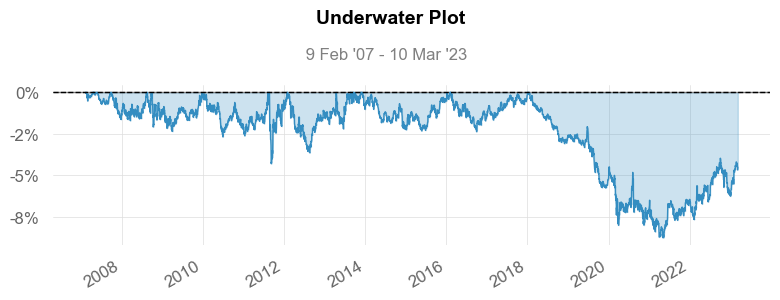

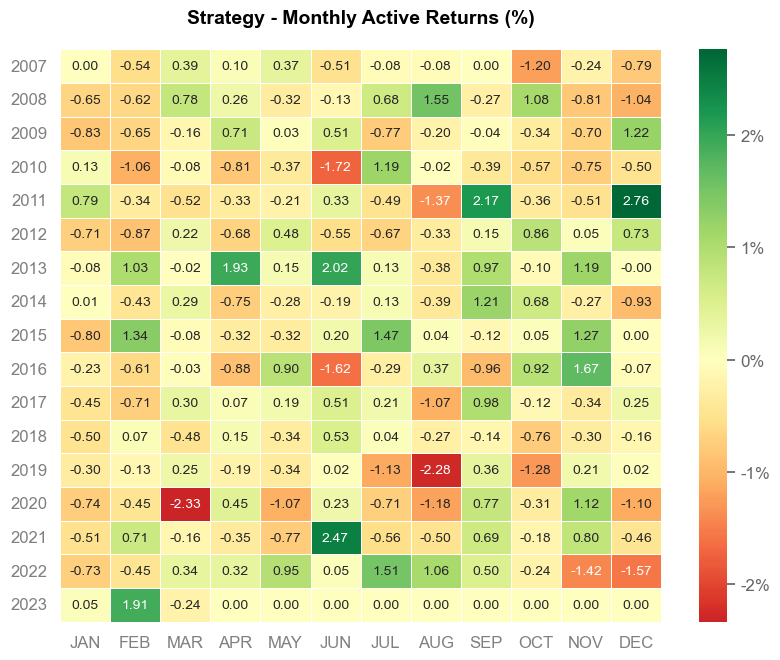

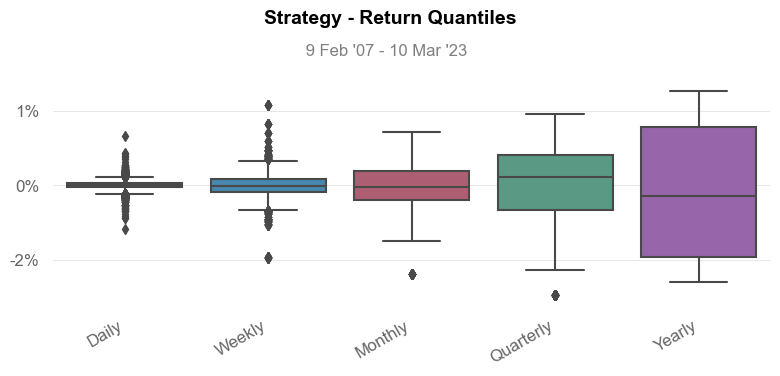

In [7]:
qs.reports.full(result_D1['Equity'].resample('D').last().dropna().pct_change(
), benchmark=benchmark_D1['Equity'].resample('D').last().dropna().pct_change())

## TF H4

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-02
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          16.16%
CAGR﹪                     0.64%

Sharpe                     0.41
Prob. Sharpe Ratio         96.72%
Smart Sharpe               0.4
Sortino                    0.61
Smart Sortino              0.6
Sortino/√2                 0.43
Smart Sortino/√2           0.42
Omega                      1.08

Max Drawdown               -5.59%
Longest DD Days            2352
Volatility (ann.)          1.87%
Calmar                     0.11
Skew                       0.51
Kurtosis                   9.71

Expected Daily %           0.0%
Expected Monthly %         0.08%
Expected Yearly %          0.88%
Kelly Criterion            3.75%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.19%
Expected Shortfall (cVaR)  -0.19%

Max Consecutive Wins       10
M

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2014-01-14  2019-01-24  2020-06-22  2352     -5.587007         -5.313588
2  2021-03-02  2023-02-22  2023-03-10   739     -4.450273         -4.321505
3  2012-01-10  2012-10-29  2013-04-14   461     -2.395571         -2.327926
4  2011-09-08  2011-10-17  2011-11-20    74     -2.255645         -2.225439
5  2010-06-11  2010-10-12  2011-01-13   217     -1.757999         -1.687963

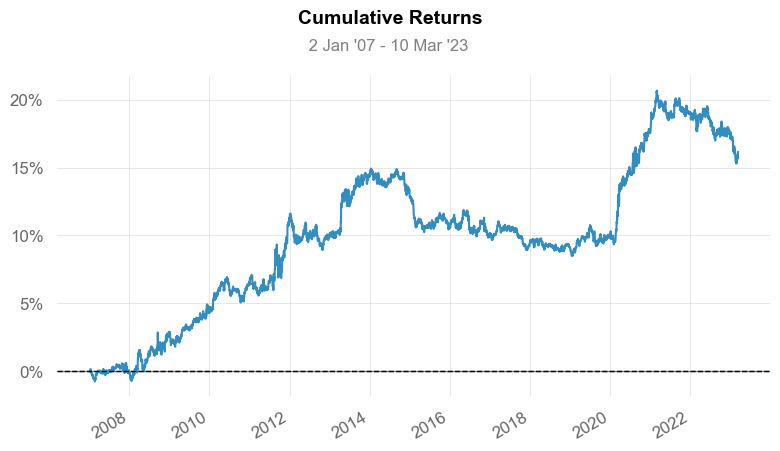

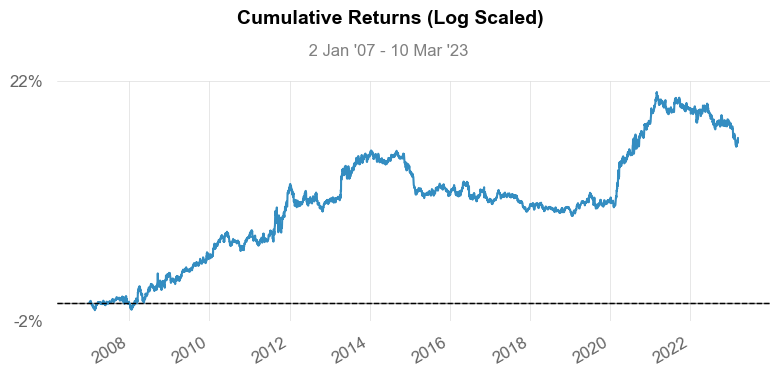

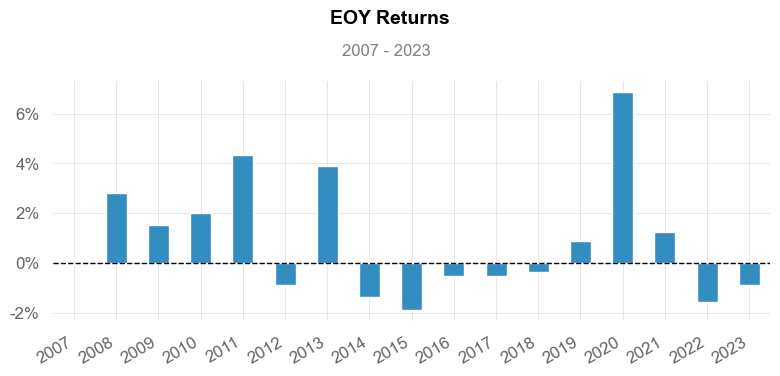

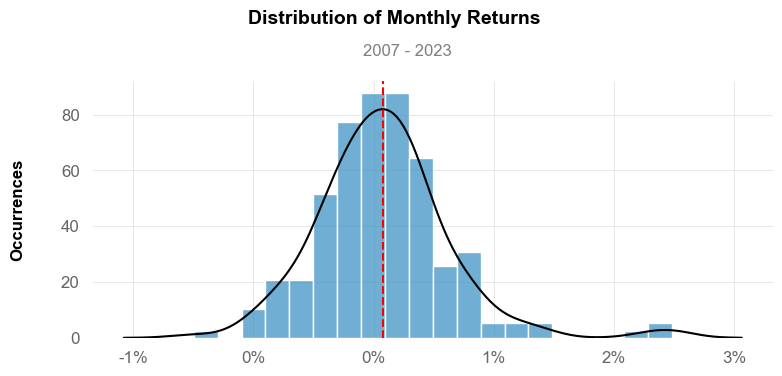

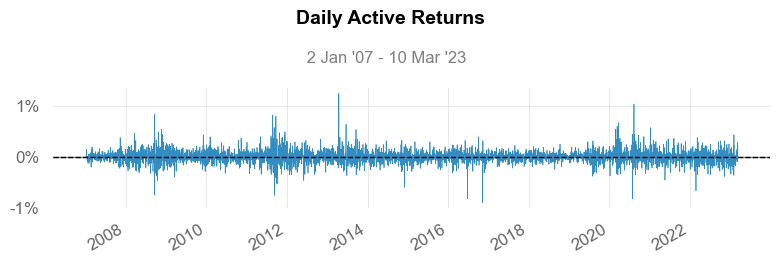

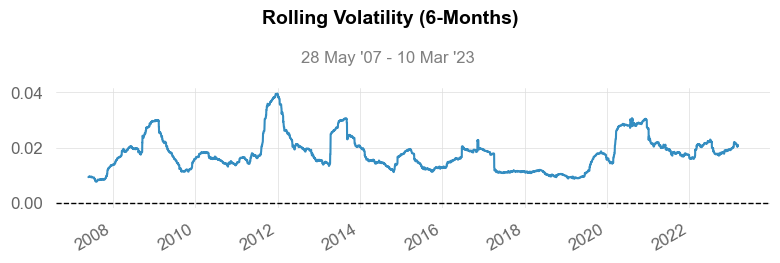

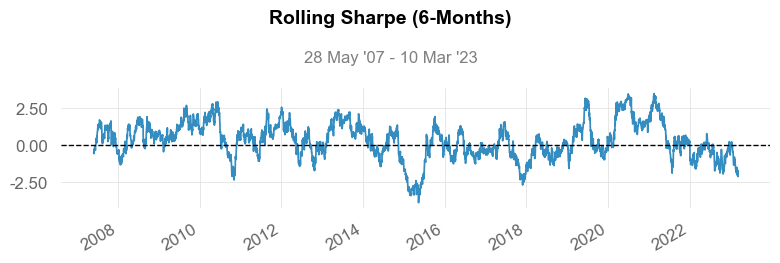

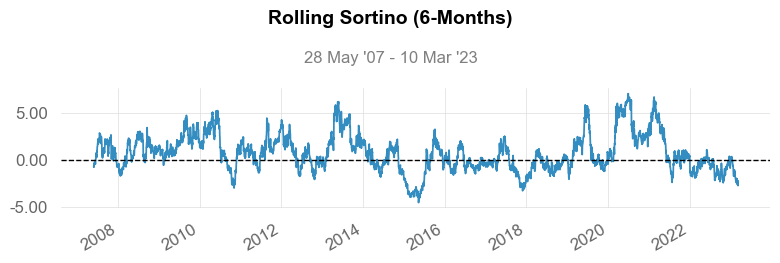

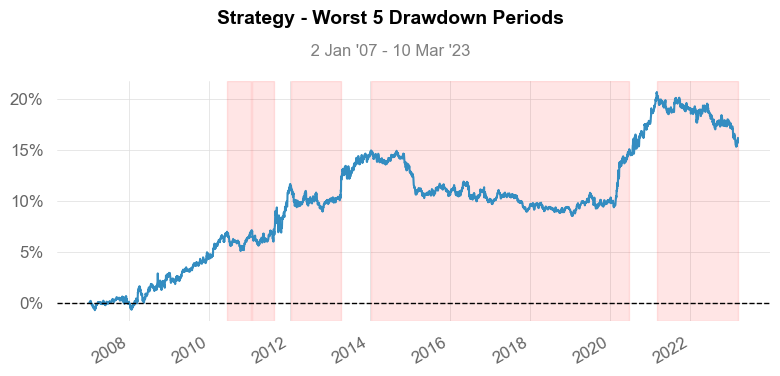

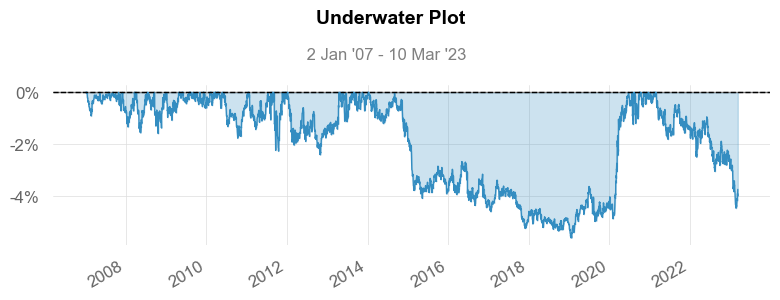

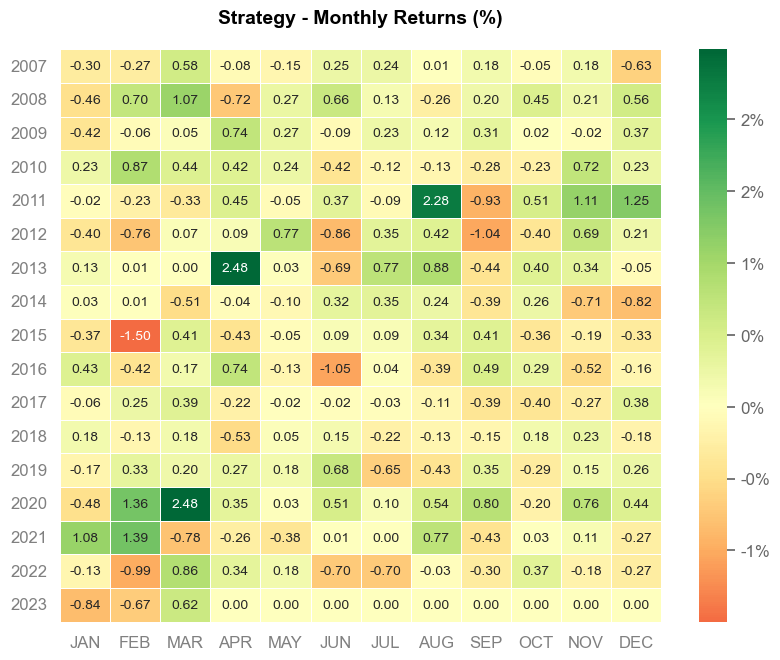

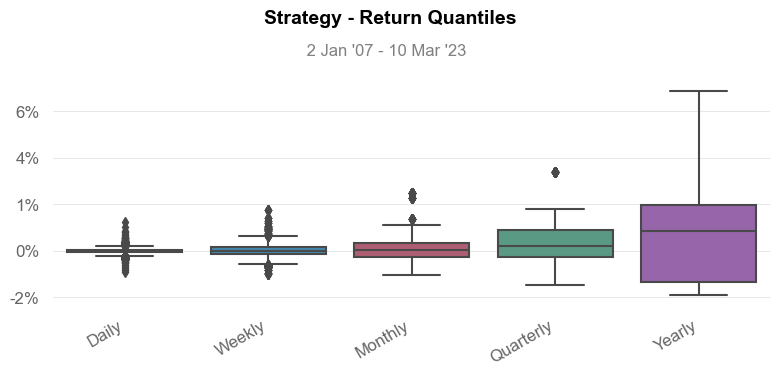

In [8]:
qs.reports.full(result_H4['Equity'].resample('D').last().dropna().pct_change())

### Compare benchmark Buy and Hold

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2007-01-08   2007-01-08
End Period                 2023-03-10   2023-03-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          12.59%       16.16%
CAGR﹪                     0.51%        0.64%

Sharpe                     0.32         0.41
Prob. Sharpe Ratio         92.1%        96.72%
Smart Sharpe               0.31         0.4
Sortino                    0.43         0.61
Smart Sortino              0.42         0.6
Sortino/√2                 0.31         0.43
Smart Sortino/√2           0.3          0.42
Omega                      1.08         1.08

Max Drawdown               -7.6%        -5.59%
Longest DD Days            3259         2352
Volatility (ann.)          1.92%        1.87%
R^2                        0.01         0.01
Information Ratio          0.0          0.0
Calmar                  

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2014-01-14  2019-01-24  2020-06-22  2352     -5.587007         -5.313588
2  2021-03-02  2023-02-22  2023-03-10   739     -4.450273         -4.321505
3  2012-01-10  2012-10-29  2013-04-14   461     -2.395571         -2.327926
4  2011-09-08  2011-10-17  2011-11-20    74     -2.255645         -2.225439
5  2010-06-11  2010-10-12  2011-01-13   217     -1.757999         -1.687963

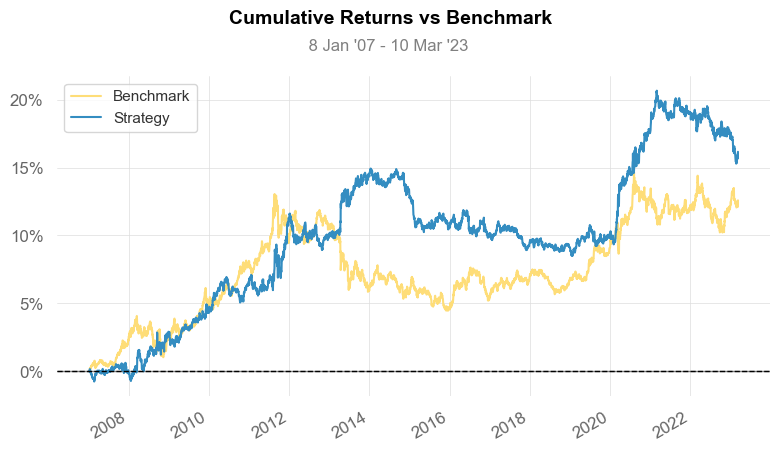

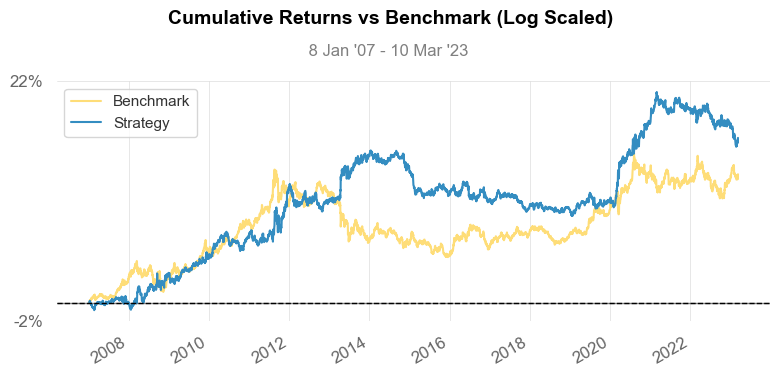

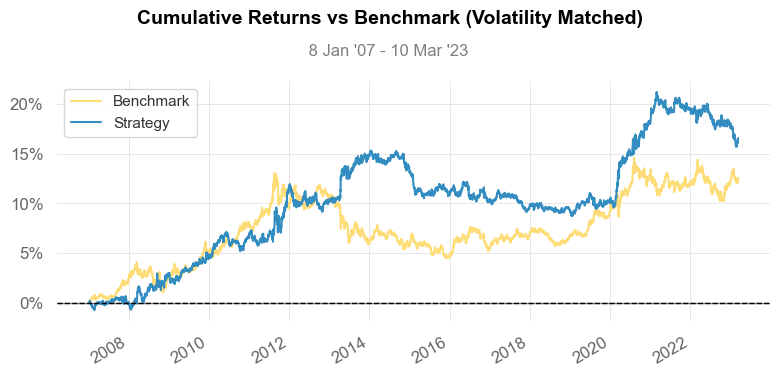

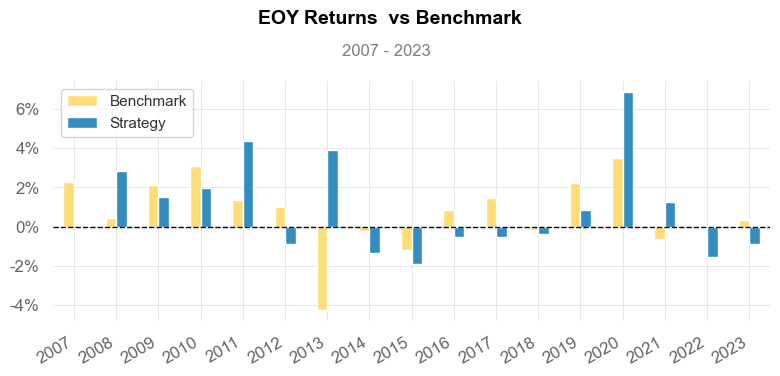

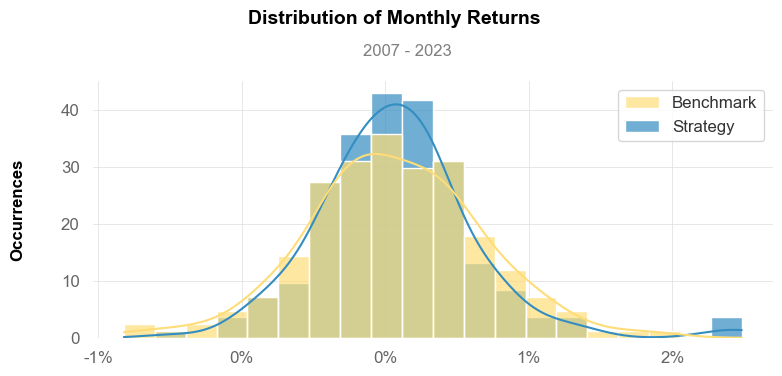

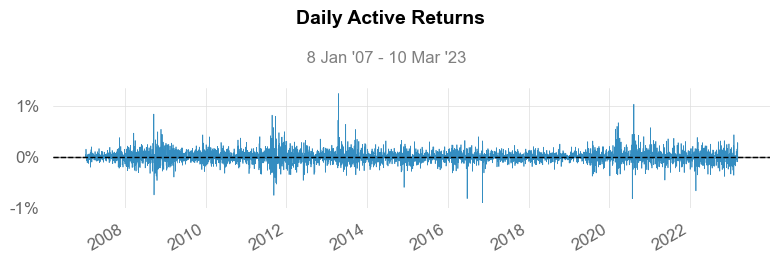

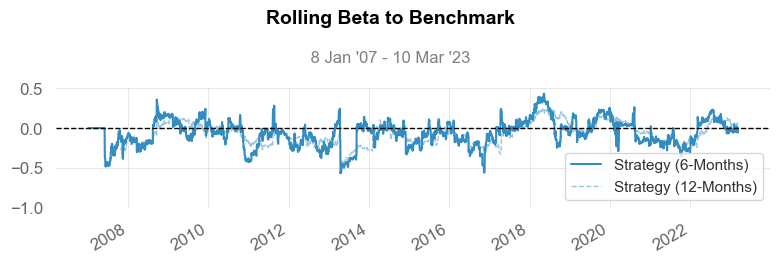

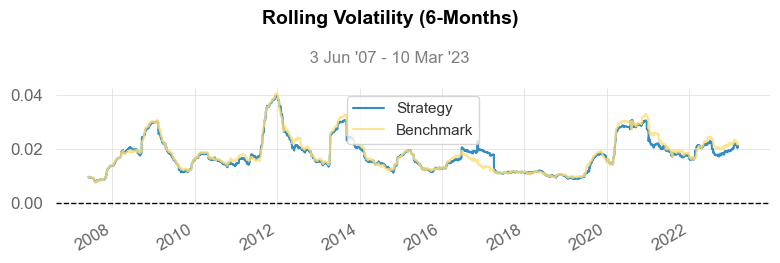

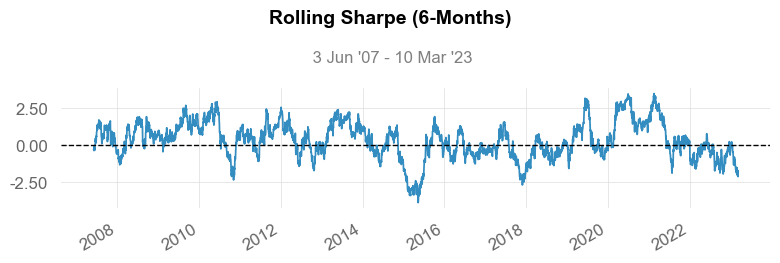

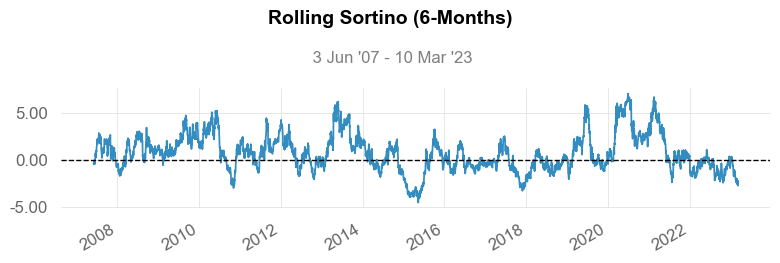

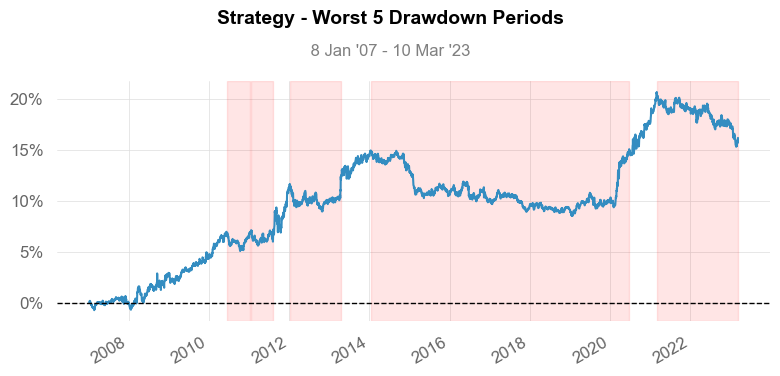

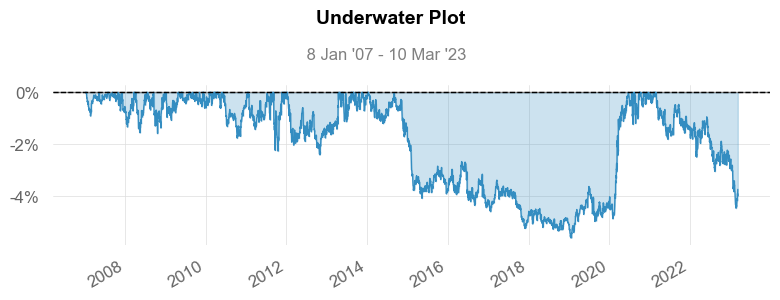

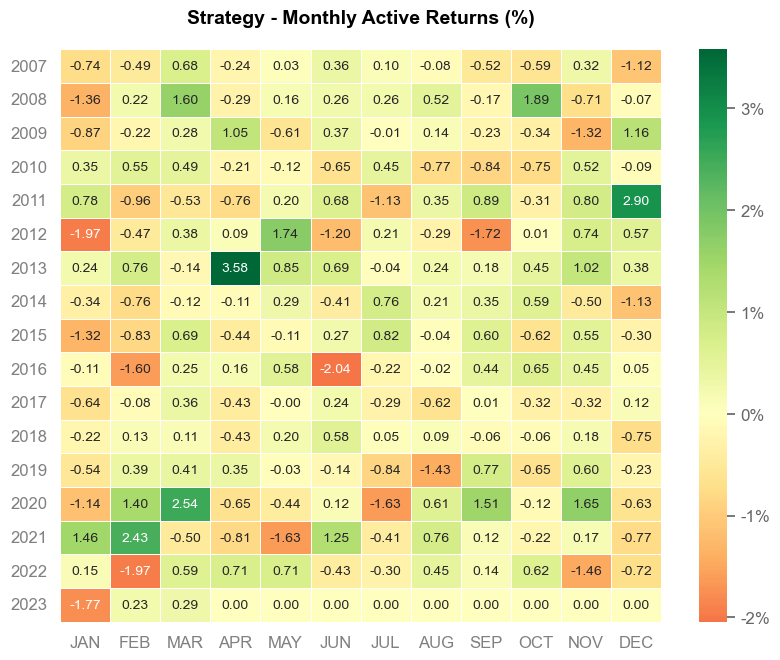

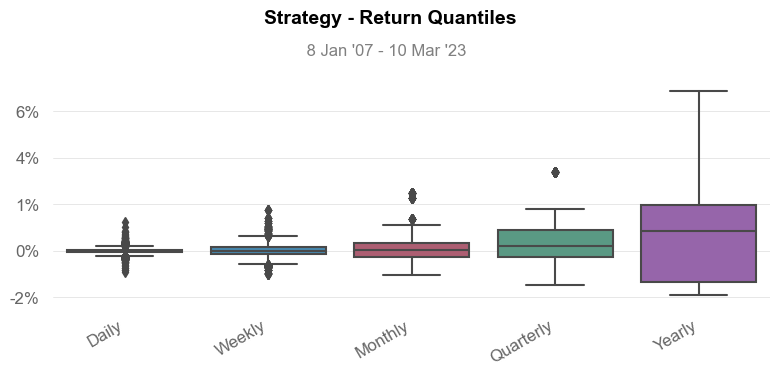

In [9]:
qs.reports.full(result_H4['Equity'].resample('D').last().dropna().pct_change(
), benchmark=benchmark_H4['Equity'].resample('D').last().dropna().pct_change())

## TF H1

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-02
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -5.74%
CAGR﹪                     -0.25%

Sharpe                     -0.13
Prob. Sharpe Ratio         28.18%
Smart Sharpe               -0.12
Sortino                    -0.19
Smart Sortino              -0.18
Sortino/√2                 -0.13
Smart Sortino/√2           -0.13
Omega                      0.98

Max Drawdown               -11.41%
Longest DD Days            2943
Volatility (ann.)          2.11%
Calmar                     -0.02
Skew                       0.61
Kurtosis                   8.01

Expected Daily %           -0.0%
Expected Monthly %         -0.03%
Expected Yearly %          -0.35%
Kelly Criterion            -1.2%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive W

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2008-10-12  2011-07-11  2013-06-27  1720    -11.411892        -11.164288
2  2015-02-18  2022-09-21  2023-03-10  2943    -10.140898         -9.558514
3  2013-07-25  2013-11-17  2014-12-08   502     -2.107799         -2.006226
4  2008-01-25  2008-04-28  2008-08-13   202     -1.871996         -1.830975
5  2008-08-26  2008-09-11  2008-10-09    45     -0.935634         -0.921971

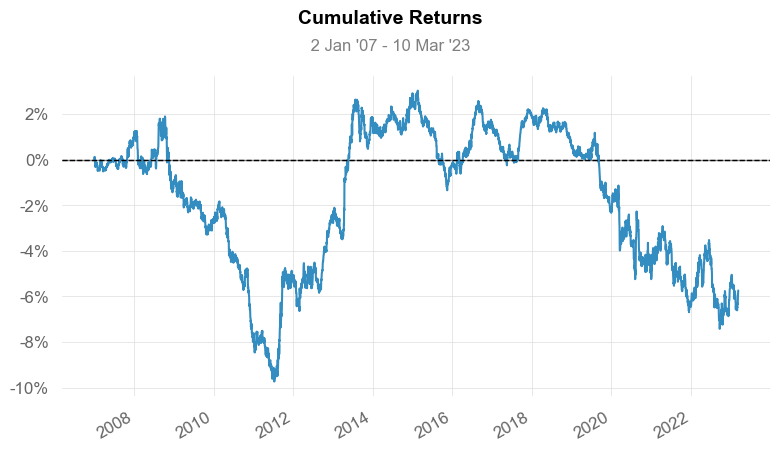

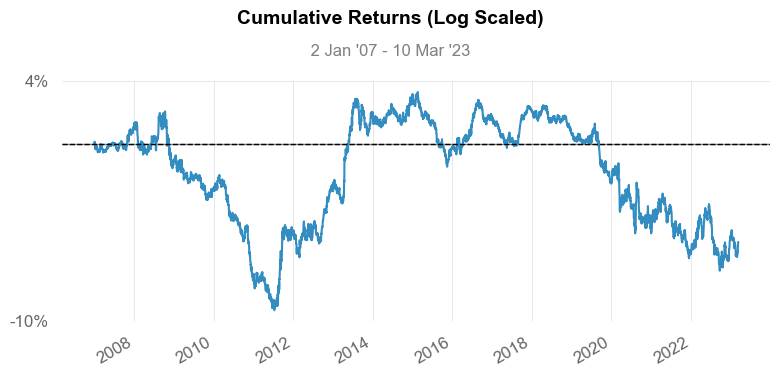

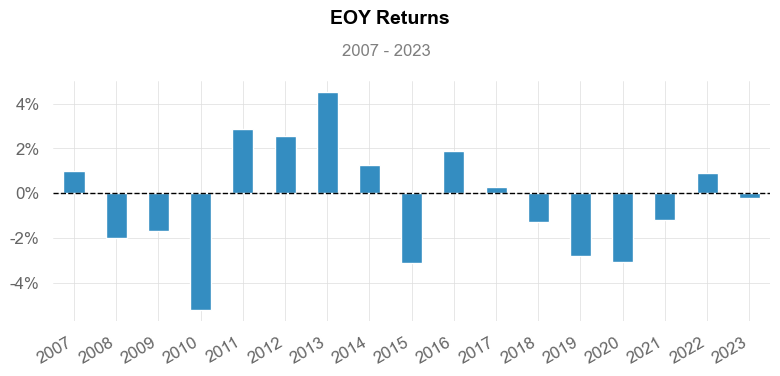

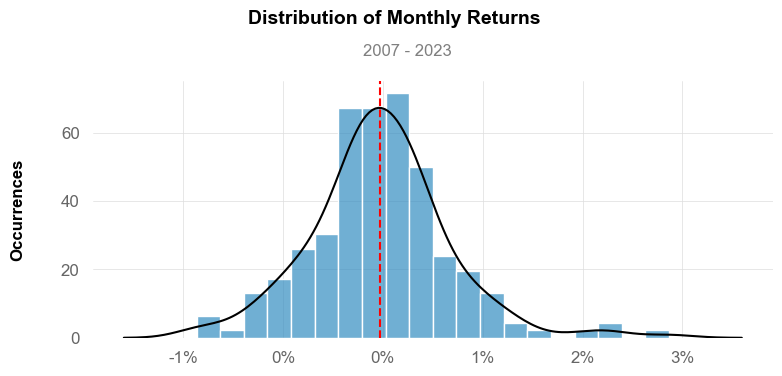

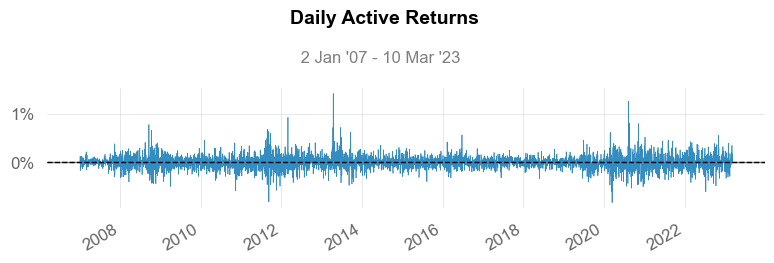

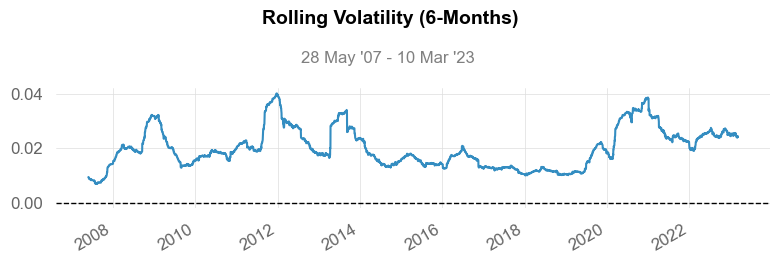

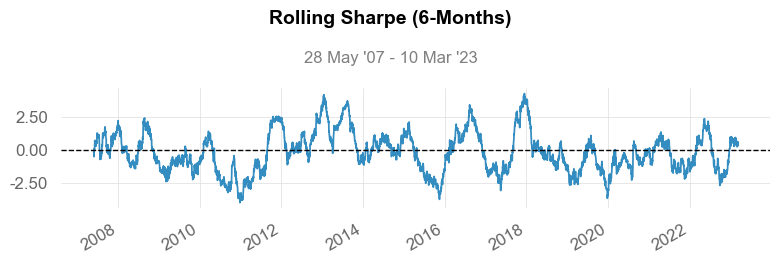

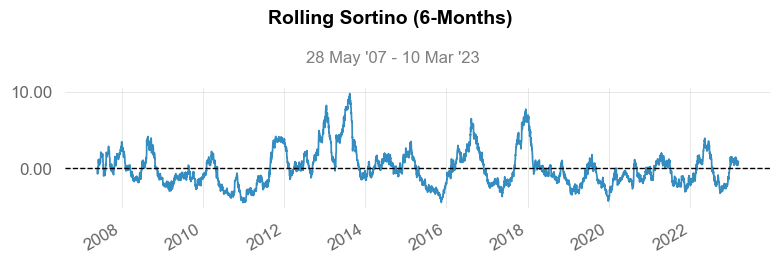

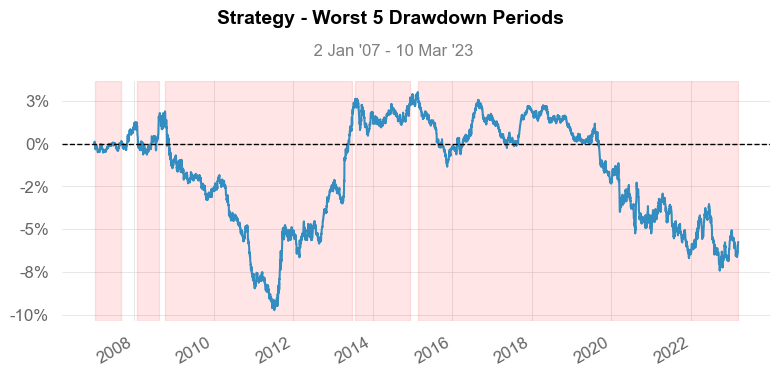

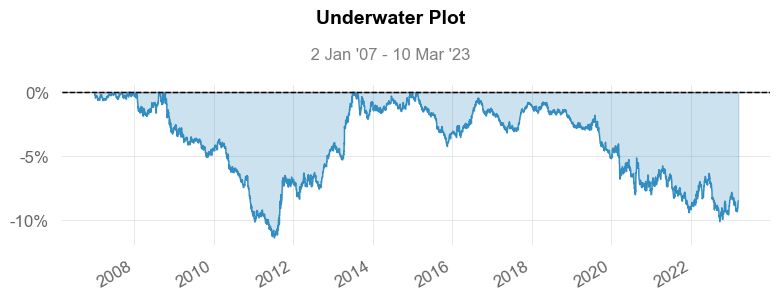

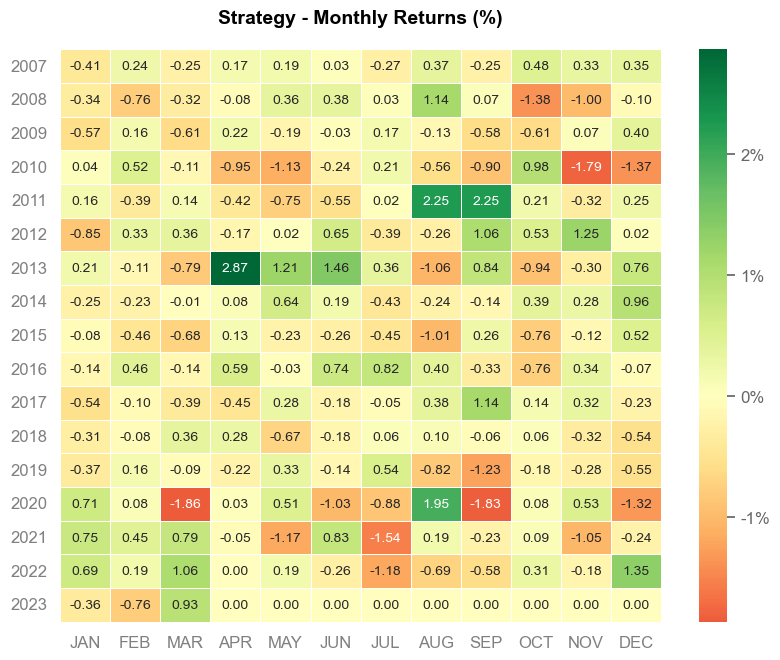

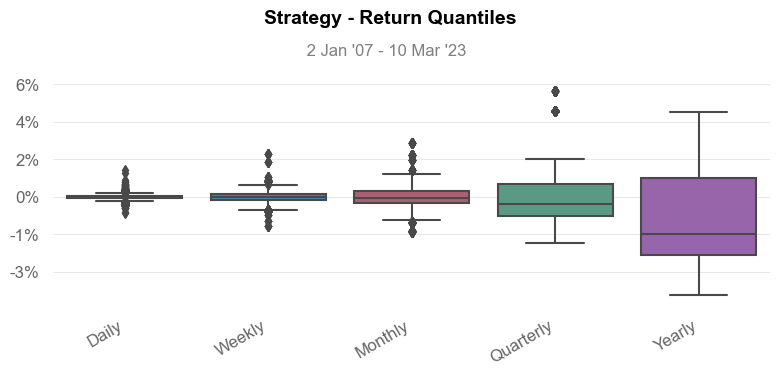

In [10]:
qs.reports.full(result_H1['Equity'].resample('D').last().dropna().pct_change() )

### Compare benchmark Buy and Hold

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2007-01-03   2007-01-03
End Period                 2023-03-10   2023-03-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          12.16%       -5.74%
CAGR﹪                     0.49%        -0.25%

Sharpe                     0.31         -0.13
Prob. Sharpe Ratio         91.44%       28.19%
Smart Sharpe               0.29         -0.12
Sortino                    0.42         -0.19
Smart Sortino              0.4          -0.18
Sortino/√2                 0.3          -0.13
Smart Sortino/√2           0.28         -0.13
Omega                      0.98         0.98

Max Drawdown               -7.6%        -11.41%
Longest DD Days            3259         2943
Volatility (ann.)          1.92%        2.11%
R^2                        0.01         0.01
Information Ratio          -0.02        -0.02
Calmar      

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2008-10-12  2011-07-11  2013-06-27  1720    -11.411892        -11.164288
2  2015-02-18  2022-09-21  2023-03-10  2943    -10.140898         -9.558514
3  2013-07-25  2013-11-17  2014-12-08   502     -2.107799         -2.006226
4  2008-01-25  2008-04-28  2008-08-13   202     -1.871996         -1.830975
5  2008-08-26  2008-09-11  2008-10-09    45     -0.935634         -0.921971

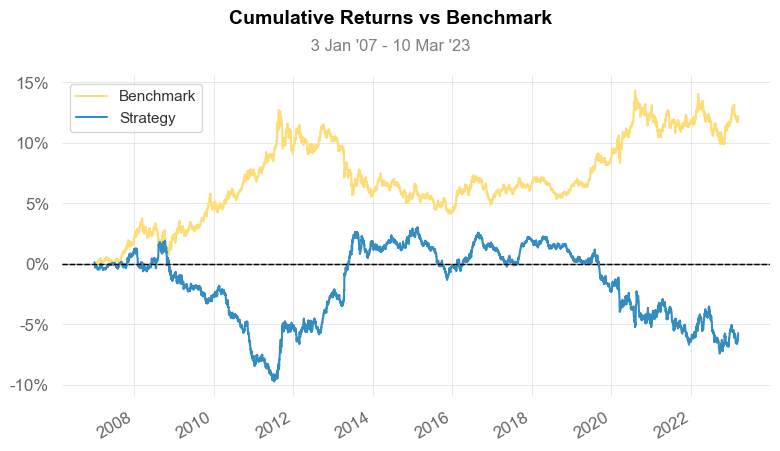

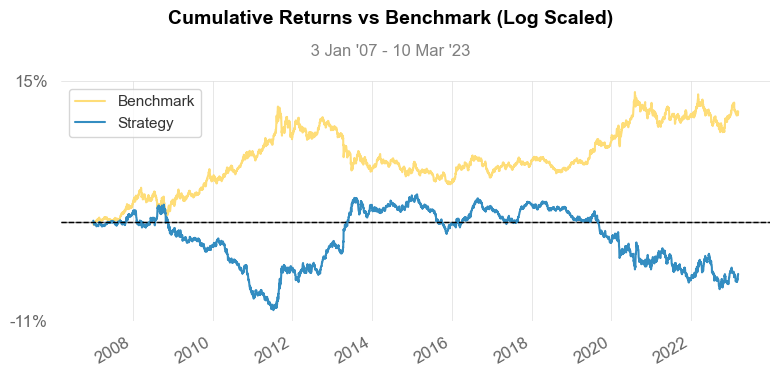

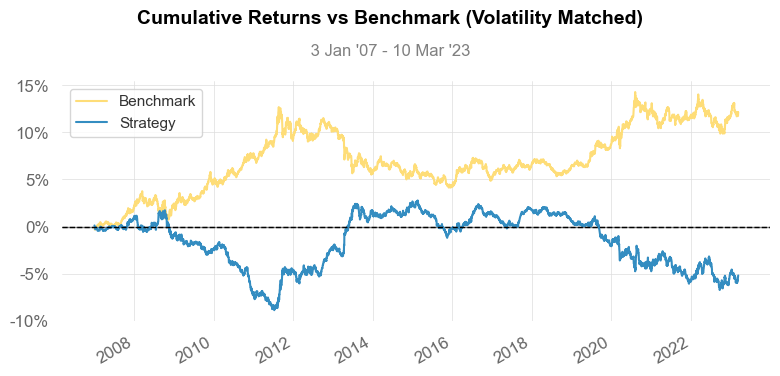

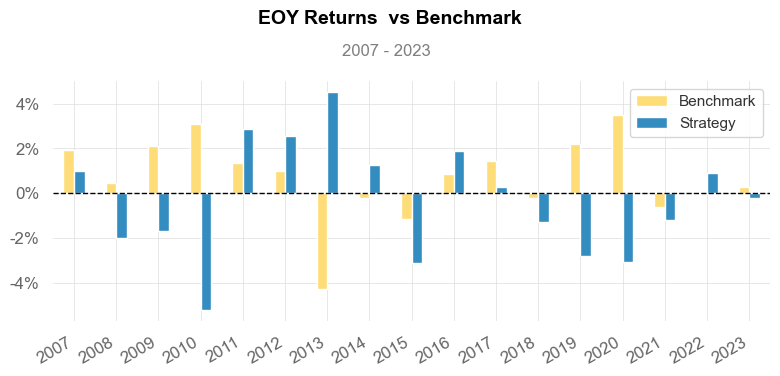

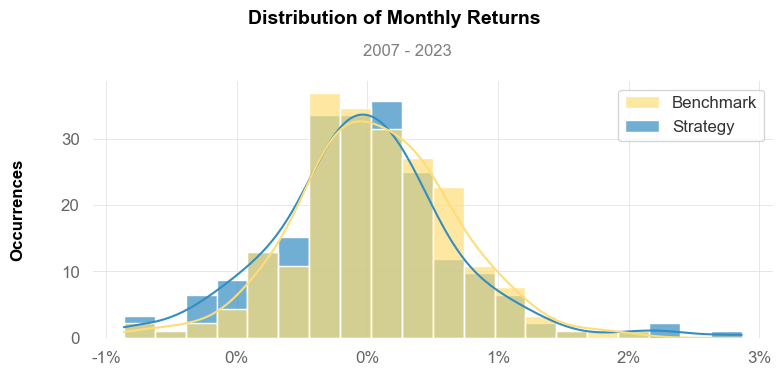

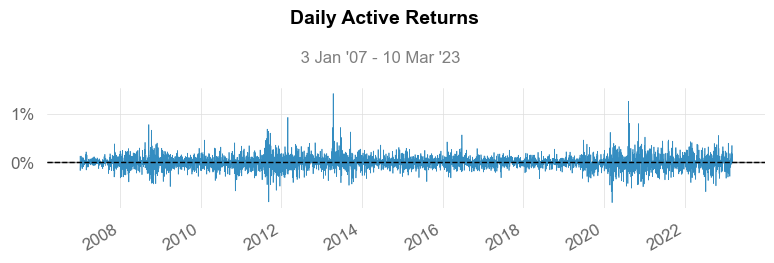

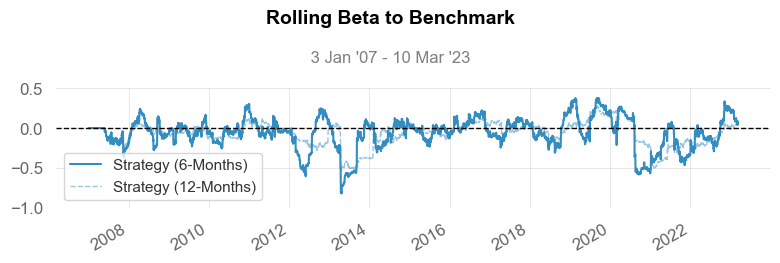

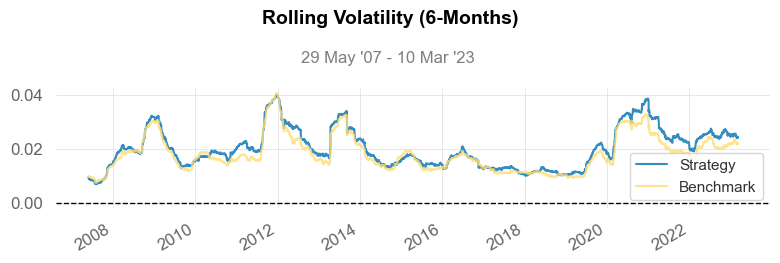

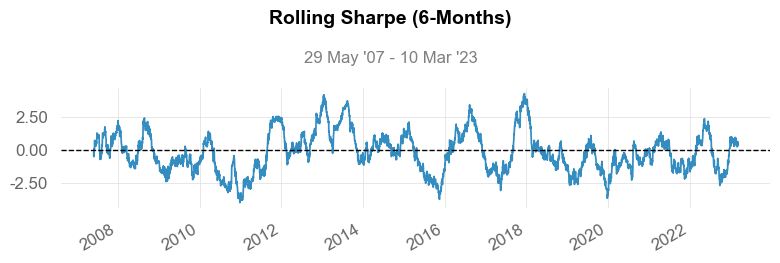

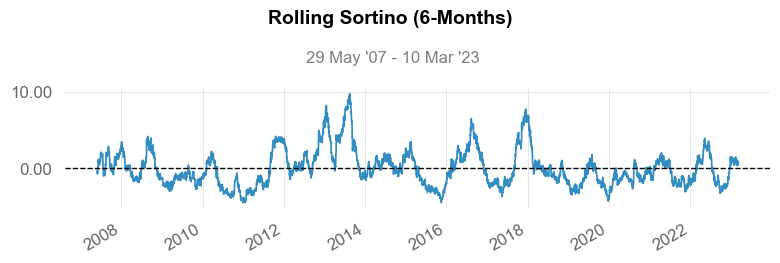

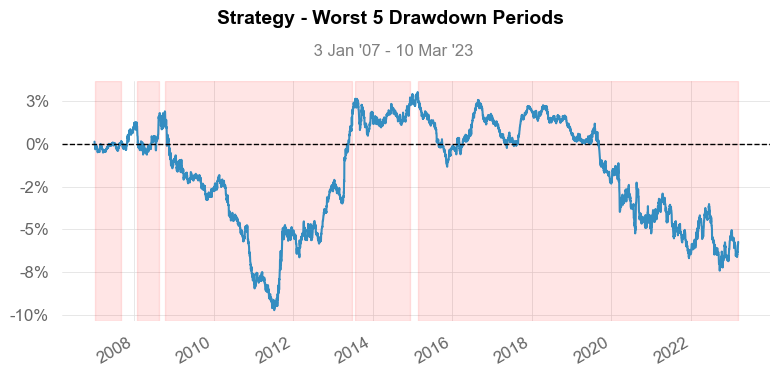

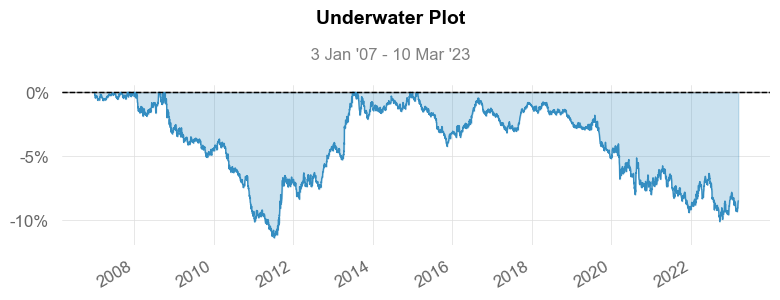

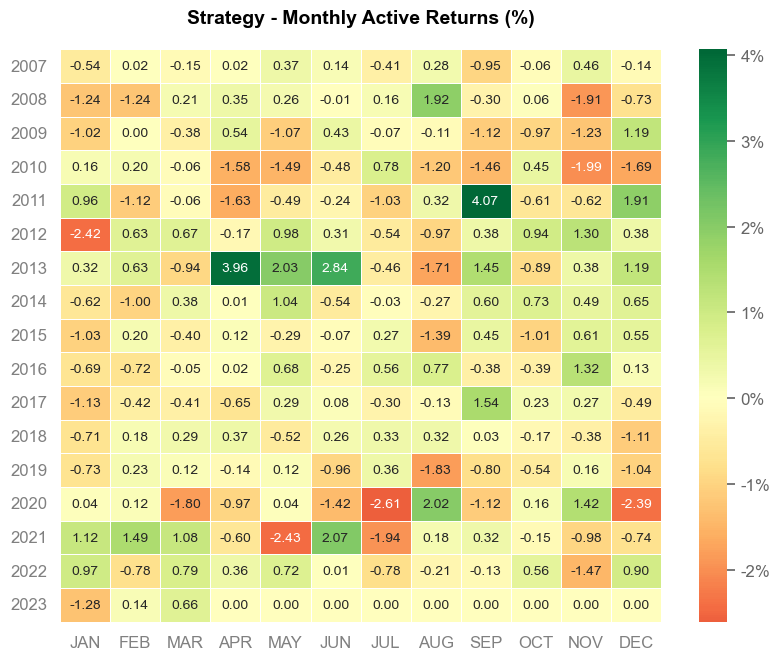

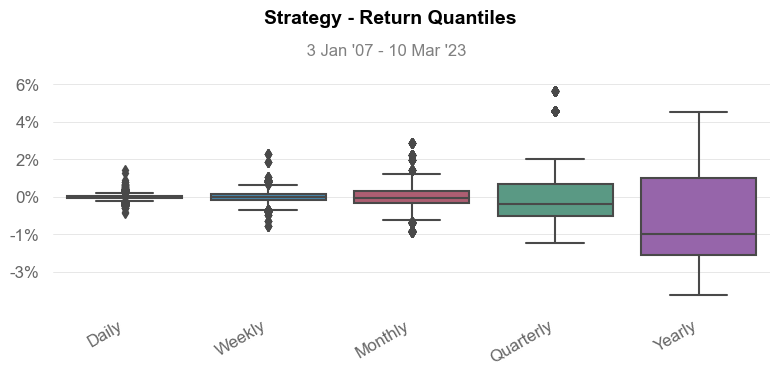

In [11]:
qs.reports.full(result_H1['Equity'].resample('D').last().dropna().pct_change(
), benchmark=benckmark_H1['Equity'].resample('D').last().dropna().pct_change())

## TF M30 

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-02
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -55.26%
CAGR﹪                     -3.37%

Sharpe                     -1.17
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -1.11
Sortino                    -1.57
Smart Sortino              -1.48
Sortino/√2                 -1.11
Smart Sortino/√2           -1.05
Omega                      0.8

Max Drawdown               -56.32%
Longest DD Days            5911
Volatility (ann.)          3.39%
Calmar                     -0.06
Skew                       -0.07
Kurtosis                   11.16

Expected Daily %           -0.02%
Expected Monthly %         -0.41%
Expected Yearly %          -4.62%
Kelly Criterion            -11.75%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.37%
Expected Shortfall (cVaR)  -0.37%

Max Consecutiv

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2007-01-03  2022-08-03  2023-03-10  5911    -56.317409        -55.802517

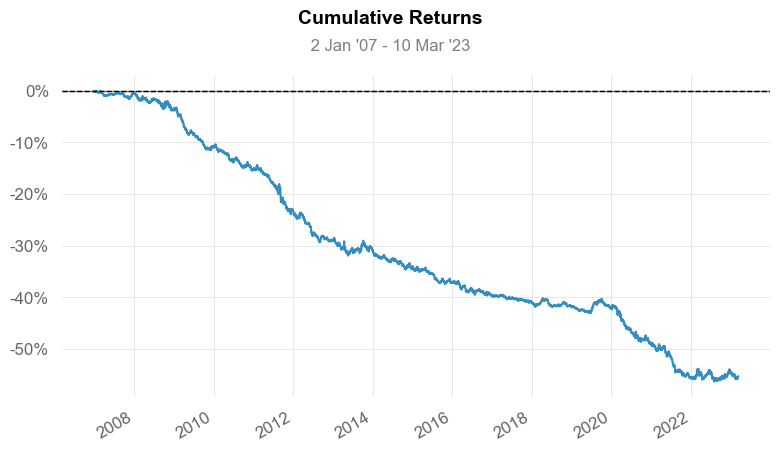

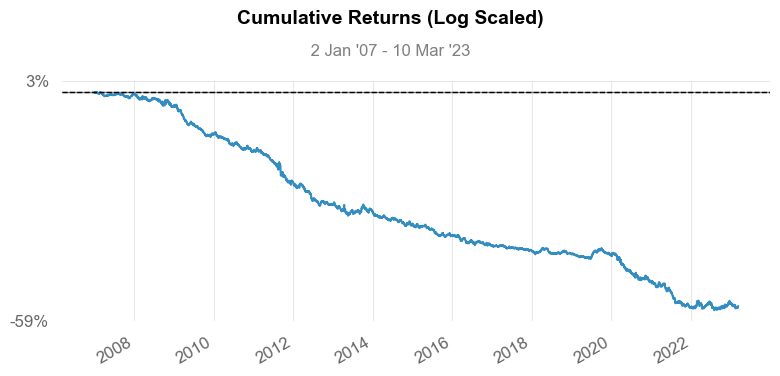

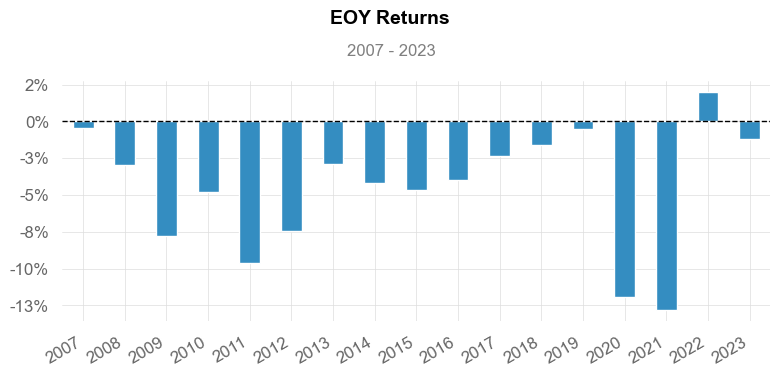

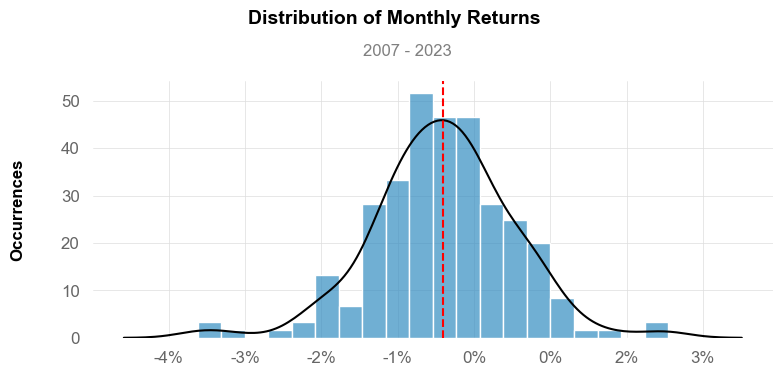

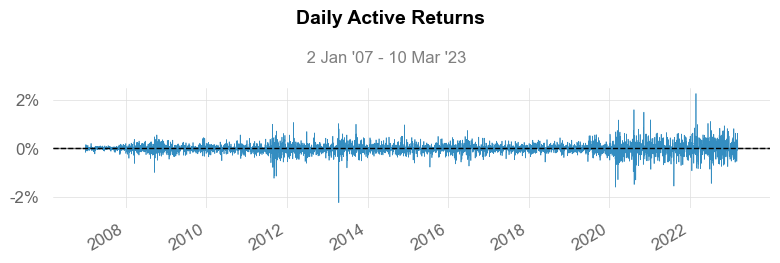

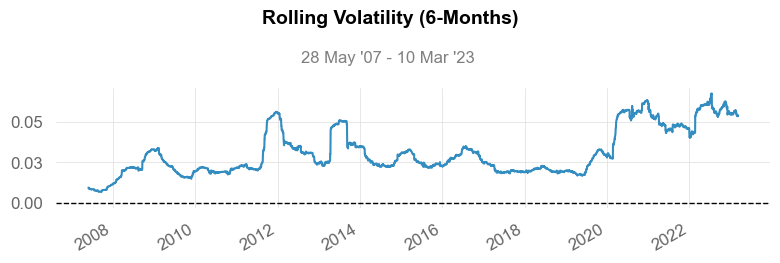

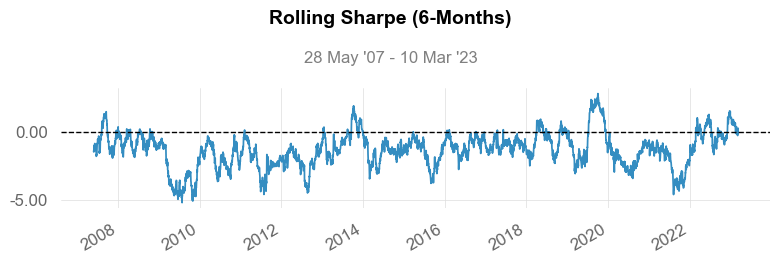

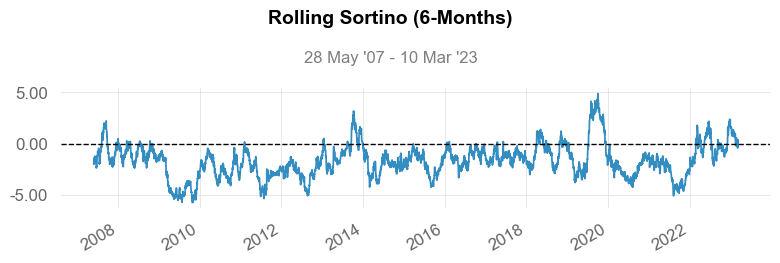

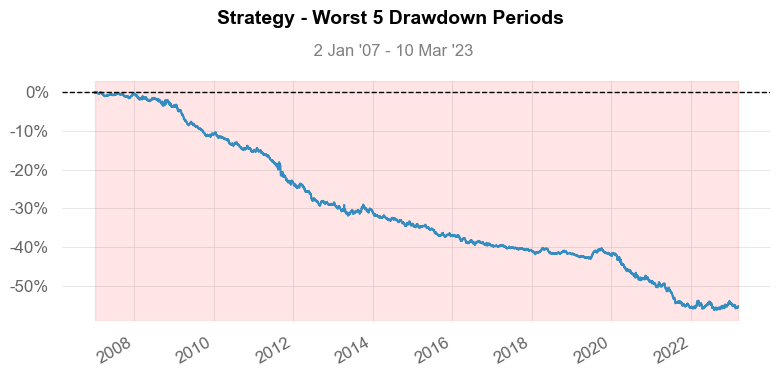

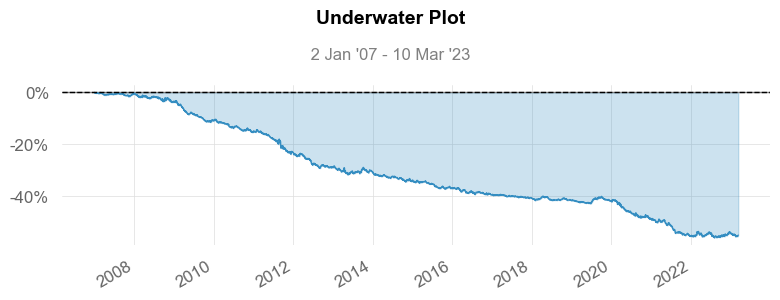

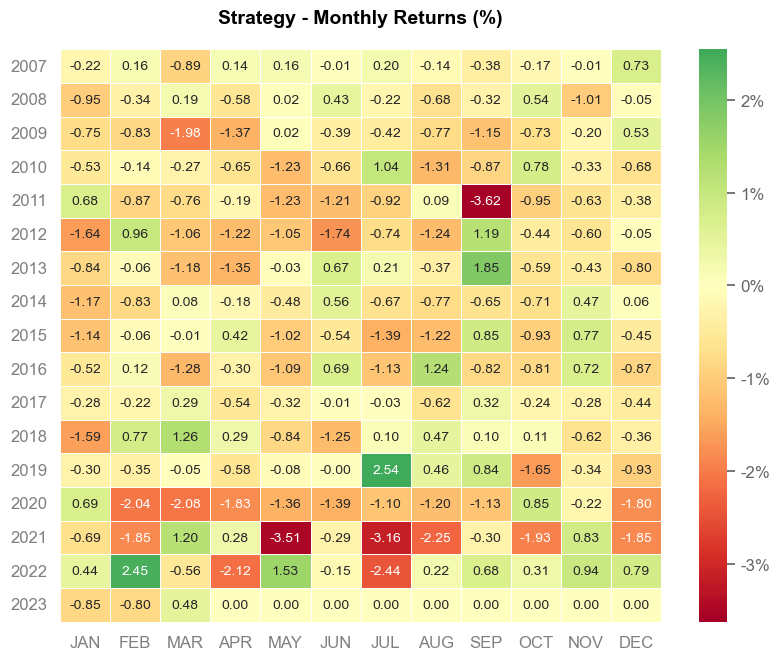

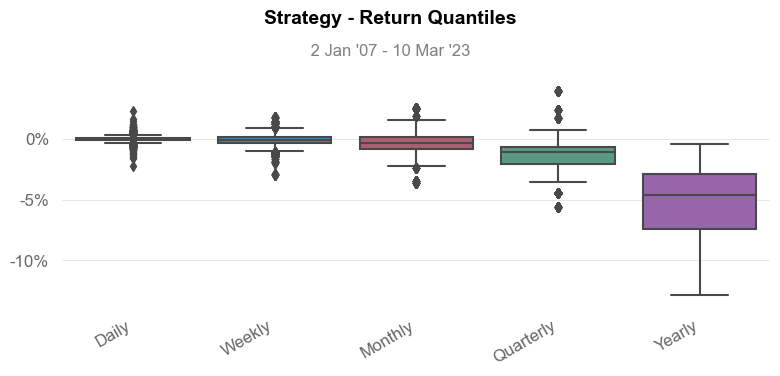

In [12]:
qs.reports.full(result_M30['Equity'].resample('D').last().dropna().pct_change())

### Compare benchmark Buy and Hold

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2007-01-03   2007-01-03
End Period                 2023-03-10   2023-03-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          12.23%       -55.27%
CAGR﹪                     0.49%        -3.37%

Sharpe                     0.31         -1.17
Prob. Sharpe Ratio         91.55%       0.0%
Smart Sharpe               0.29         -1.11
Sortino                    0.42         -1.57
Smart Sortino              0.4          -1.48
Sortino/√2                 0.3          -1.11
Smart Sortino/√2           0.28         -1.05
Omega                      0.8          0.8

Max Drawdown               -7.6%        -56.3%
Longest DD Days            3259         5858
Volatility (ann.)          1.92%        3.39%
R^2                        0.0          0.0
Information Ratio          -0.07        -0.07
Calmar          

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2007-02-25  2022-08-03  2023-03-10  5858    -56.304156        -55.791288
2  2007-01-08  2007-02-07  2007-02-22    46     -0.376791         -0.353382
3  2007-01-04  2007-01-04  2007-01-04     1     -0.057797               NaN

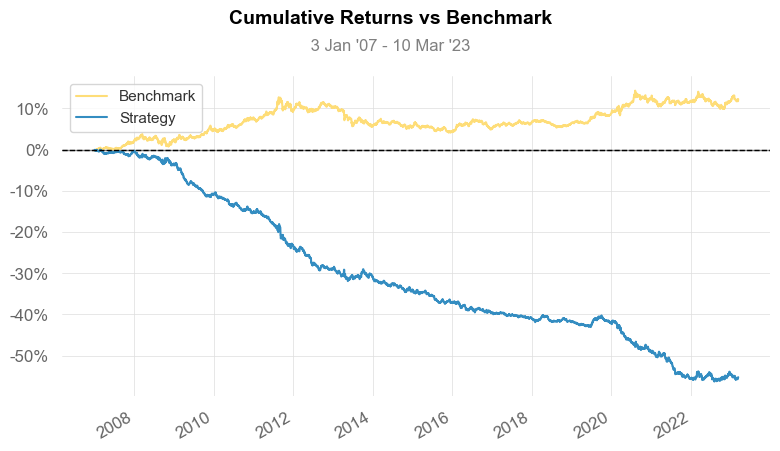

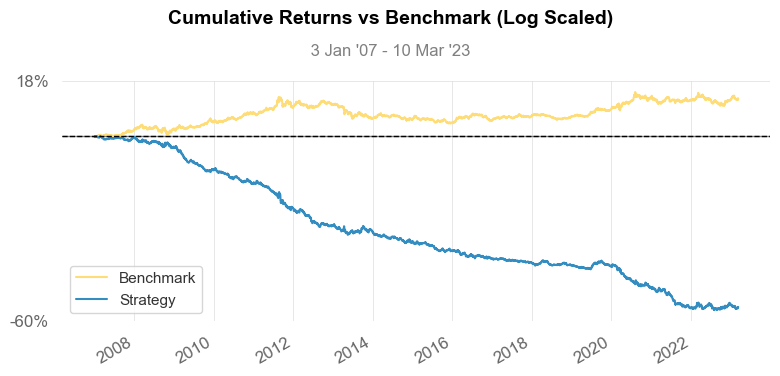

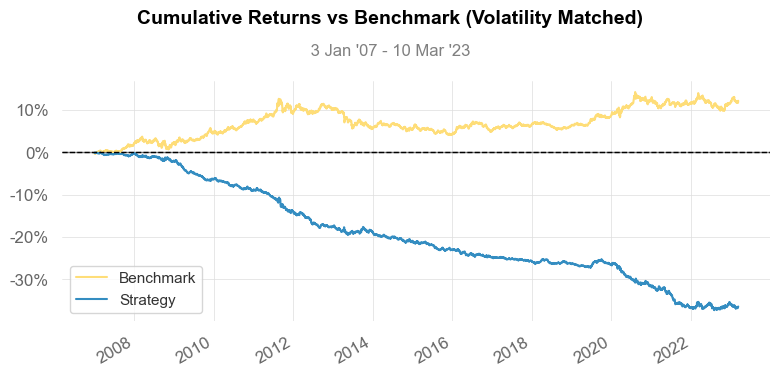

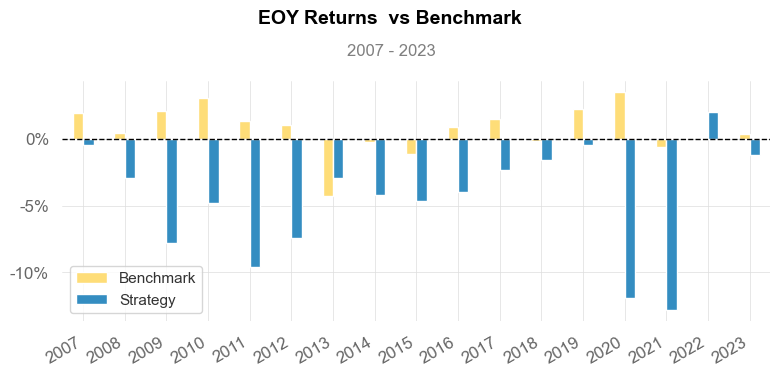

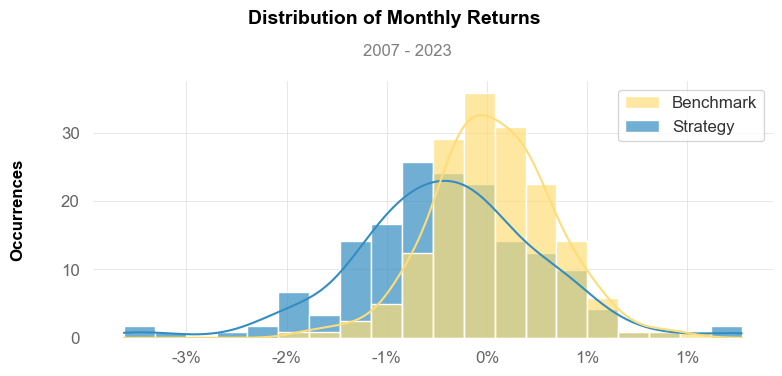

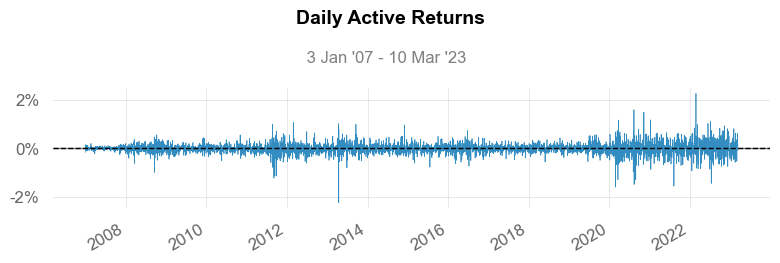

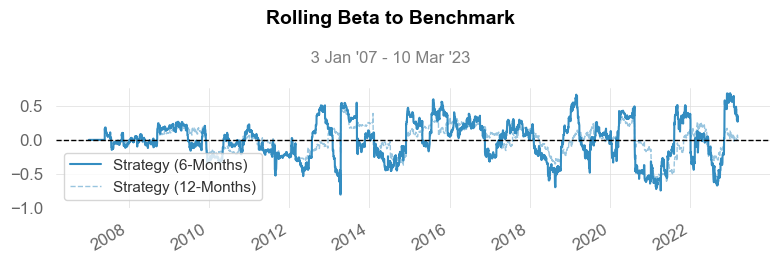

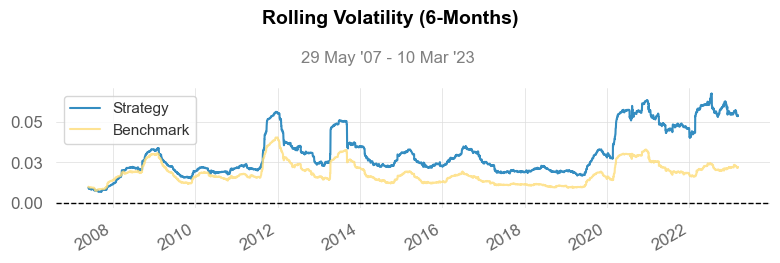

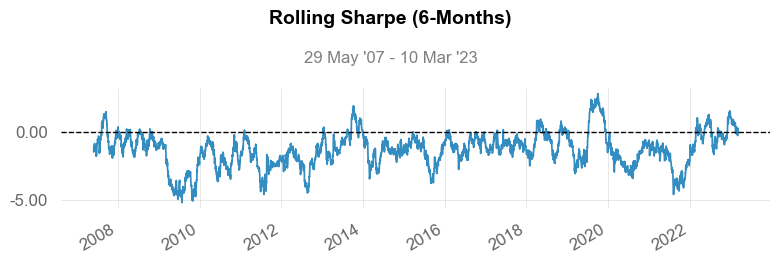

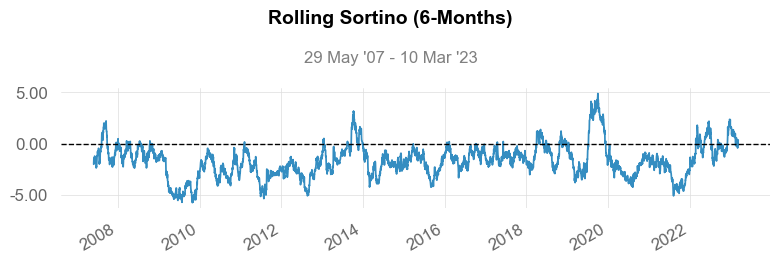

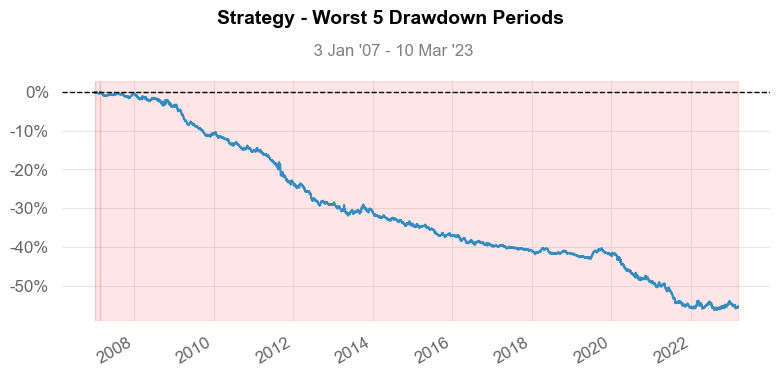

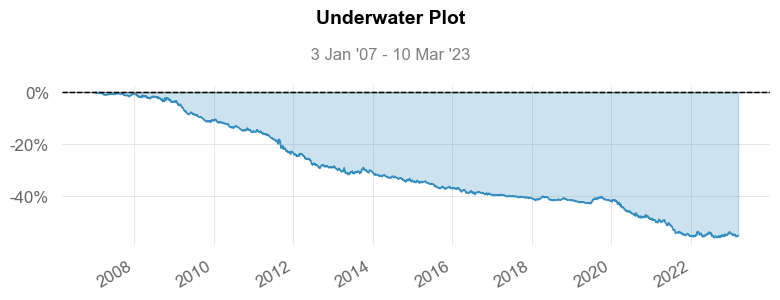

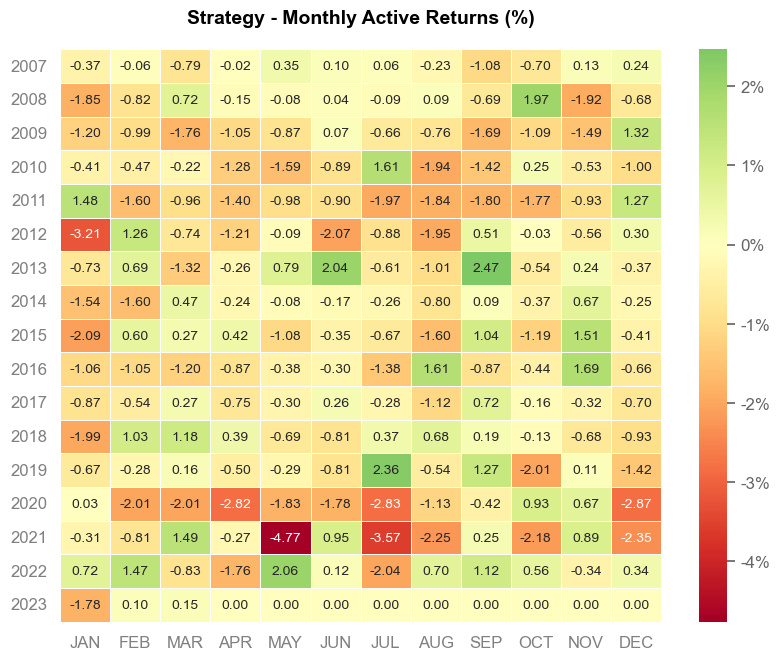

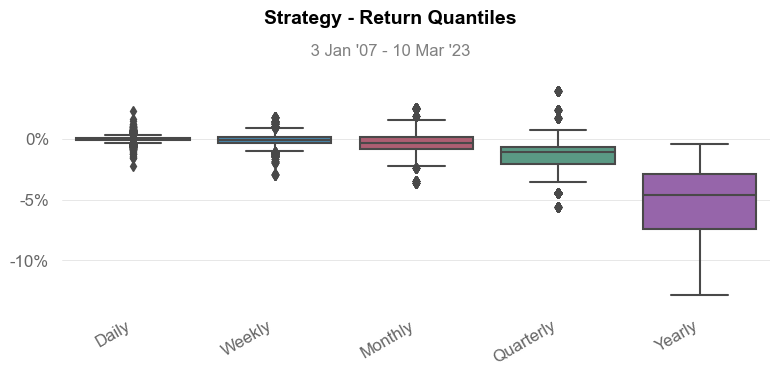

In [13]:
qs.reports.full(result_M30['Equity'].resample('D').last().dropna().pct_change(
), benchmark=benckmark_M30['Equity'].resample('D').last().dropna().pct_change())